In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_rich_income'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = 'f97bce55-e03a-41b2-a856-e8eda10cb67f'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(456, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.814678,1.000000,0.000000,0.816663,1.000000,0.000000,0.813396,1.000000,0.000000,0.815000
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-16 07:05:51.322,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.762708,1.000000,0.000000,0.761857,1.000000,0.000000,0.762531,1.000000,0.000000,0.762200
12,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 06:15:21.364,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.815947,1.000000,0.000000,0.819923,1.000000,0.000000,0.814182,1.000000,0.000000,0.817000
13,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-16 06:15:21.376,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.760987,1.000000,0.000000,0.759862,1.000000,0.000000,0.761057,1.000000,0.000000,0.760470
24,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.642140,0.592871,0.858724,0.640074,0.592959,0.849944,0.636928,0.587015,0.854497,0.638473
25,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-16 07:05:51.322,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.693114,0.640998,0.860625,0.692006,0.639435,0.860187,0.694442,0.642563,0.861029,0.693245
36,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 06:15:21.364,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.616598,0.565762,0.841963,0.618674,0.571765,0.832262,0.609494,0.557077,0.839166,0.614001
37,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-16 06:15:21.376,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.666948,0.614606,0.833597,0.665831,0.612907,0.833301,0.668214,0.616242,0.833752,0.667044
48,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.814635,1.000000,0.000000,0.786932,1.000000,0.000000,0.825239,1.000000,0.000000,0.808489
49,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-16 07:05:51.322,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.664050,1.000000,0.000000,0.663038,1.000000,0.000000,0.664817,1.000000,0.000000,0.663944


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.814678,1.000000,0.000000,0.816663,1.000000,0.000000,0.813396,1.000000,0.000000,0.815000
24,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.642140,0.592871,0.858724,0.640074,0.592959,0.849944,0.636928,0.587015,0.854497,0.638473
48,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.814635,1.000000,0.000000,0.786932,1.000000,0.000000,0.825239,1.000000,0.000000,0.808489
72,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.183102,0.000000,1.000000,0.195936,0.000000,1.000000,0.178388,0.000000,1.000000,0.185950
96,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.187529,0.000000,1.000000,0.174173,0.000000,1.000000,0.196103,0.000000,1.000000,0.184125
120,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.057629,0.052641,0.079557,0.057343,0.052851,0.077351,0.057292,0.052122,0.079824,0.057317
144,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.059532,0.040733,0.142174,0.059074,0.040753,0.140680,0.056926,0.038770,0.136065,0.057980
168,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.915353,0.942606,0.795548,0.916284,0.942958,0.797467,0.918933,0.945252,0.804211,0.917633
192,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.509977,0.515241,0.486838,0.553887,0.571563,0.475150,0.489144,0.488378,0.492487,0.520926
216,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 07:05:51.311,f97bce55-e03a-41b2-a856-e8eda10cb67f,Exp_iter_1,...,0.651471,0.601495,0.871167,0.649295,0.601567,0.861894,0.646287,0.595636,0.867072,0.647764


In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [13]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.017548,-0.029159,-0.028638,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.021930,-0.020605,-0.020668,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.017548,0.029159,0.028638,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.052797,1.070541,1.082039,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.052333,0.070485,0.082495,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.003267,0.000306,0.002413,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,0.997117,1.014059,1.018671,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,0.000051,-0.001955,-0.002345,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,0.000057,-0.001473,-0.001763,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,1.001363,0.964980,0.957946,RandomForestClassifier,Exp_iter_1,0.7,0


In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.017548,-0.029159,-0.028638,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.021930,-0.020605,-0.020668,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.017548,0.029159,0.028638,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.052797,1.070541,1.082039,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.052333,0.070485,0.082495,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [15]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [16]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

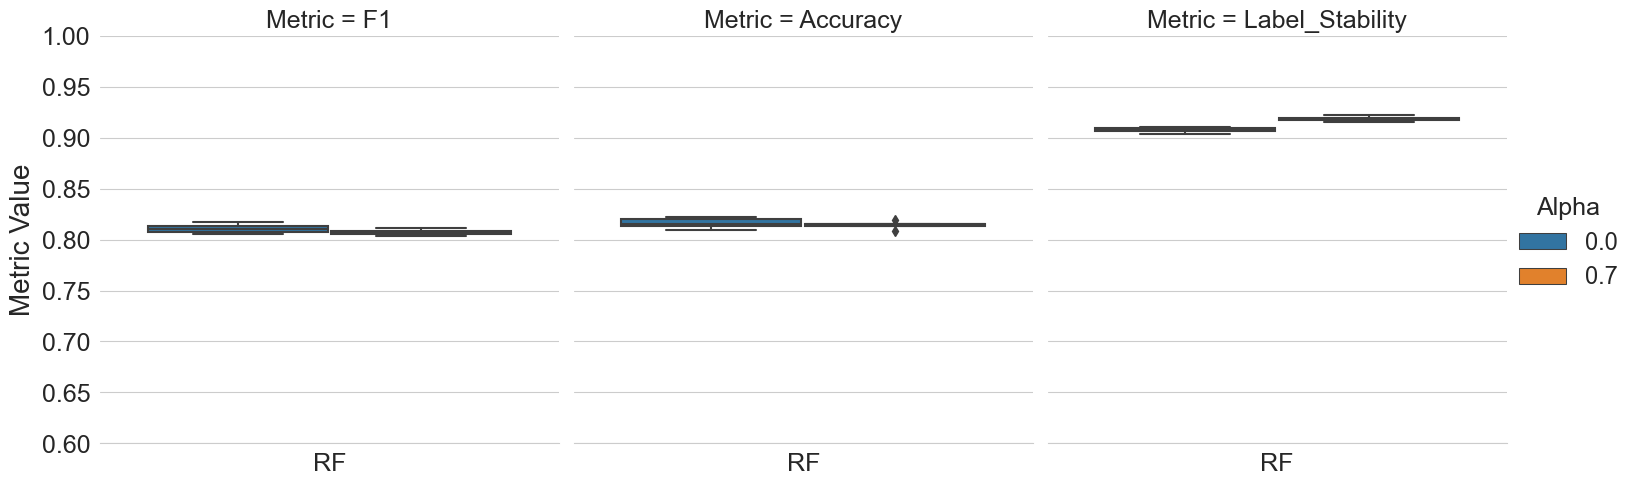

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

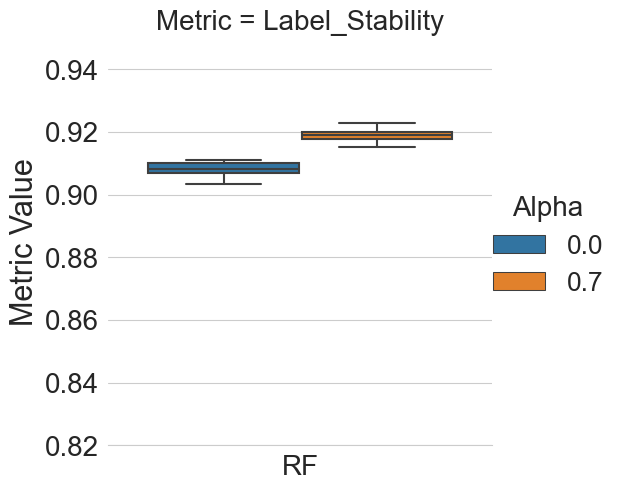

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

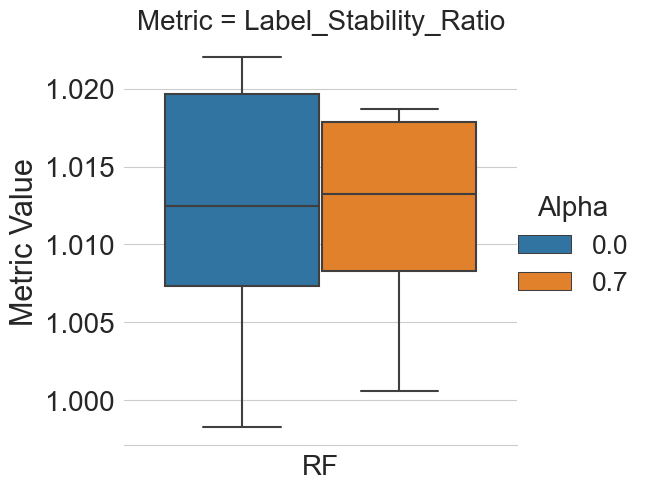

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

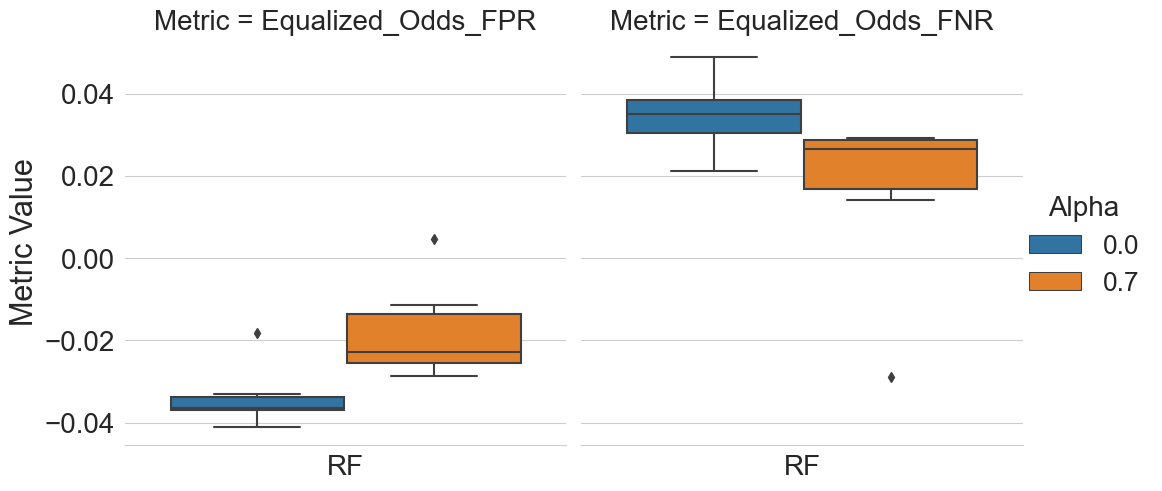

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [21]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Rich set',
    1: 'Poor set',
}

<Figure size 1200x600 with 0 Axes>

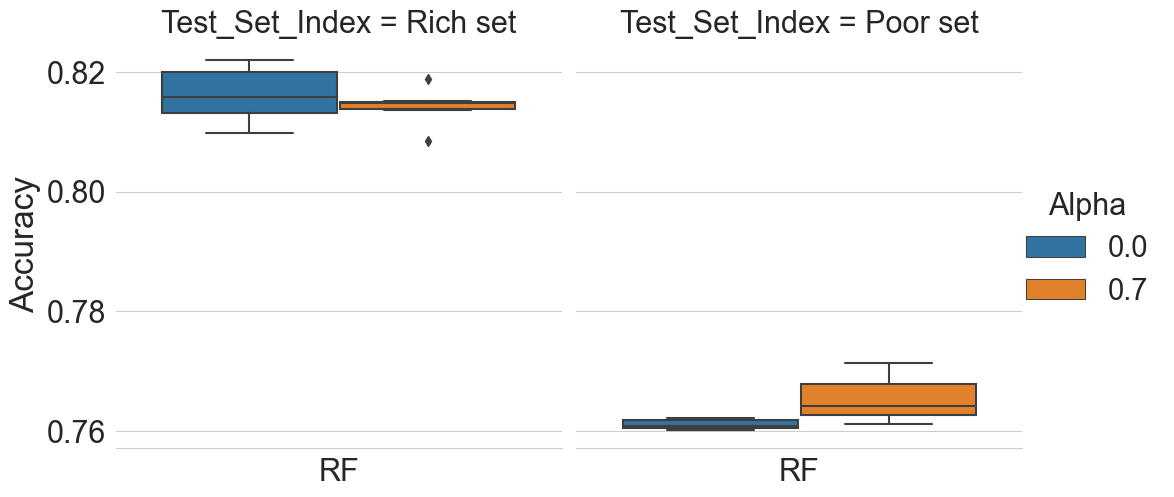

In [22]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

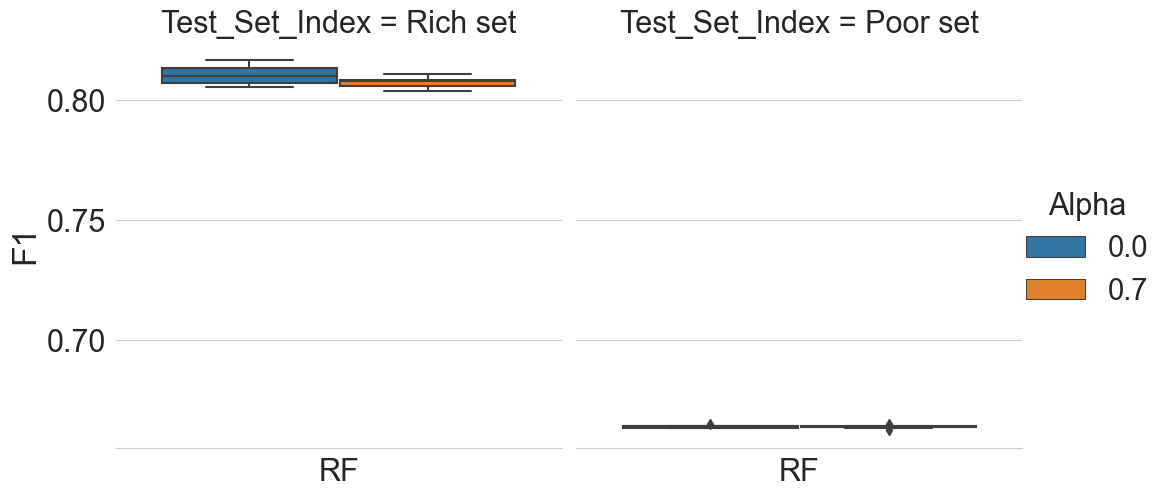

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

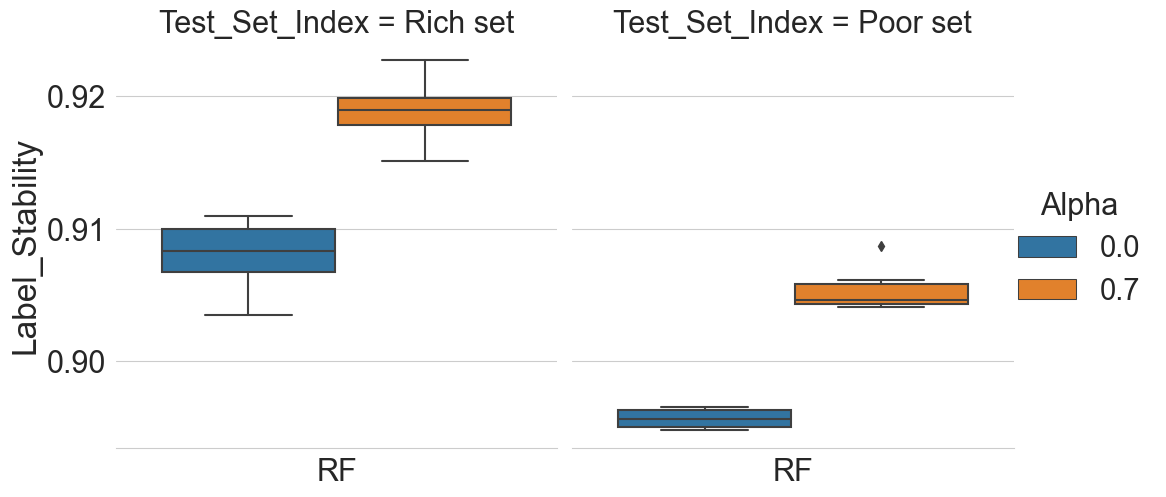

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

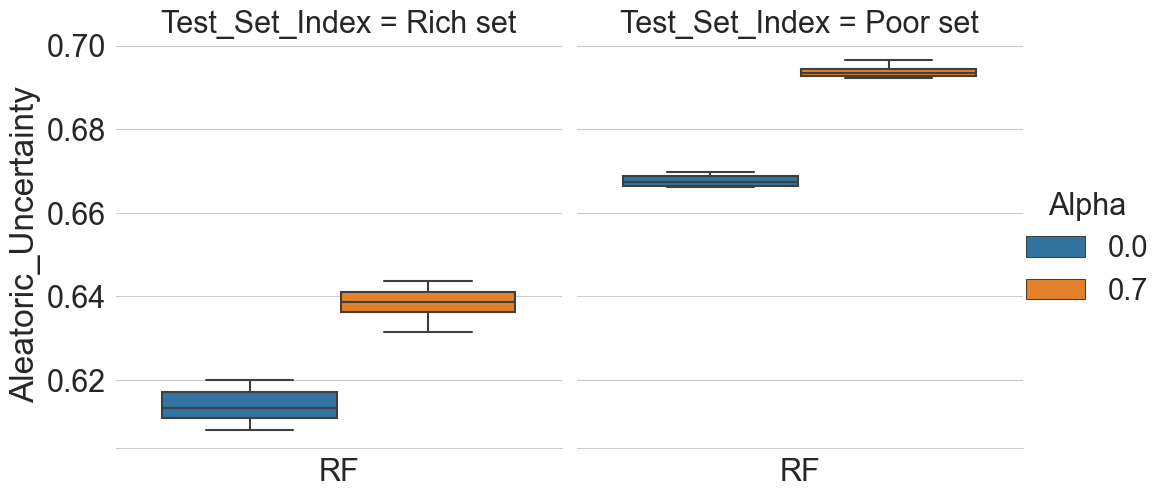

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

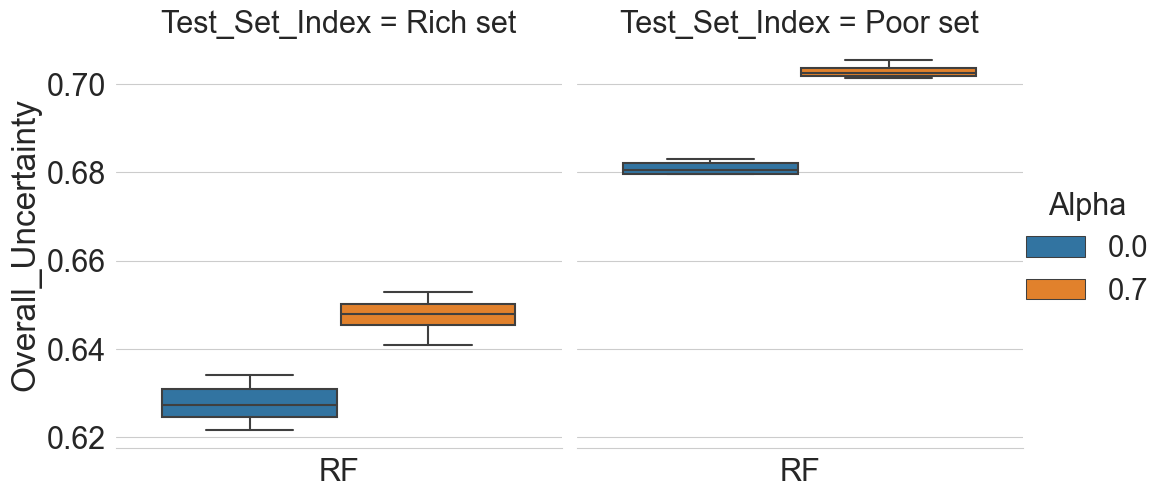

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

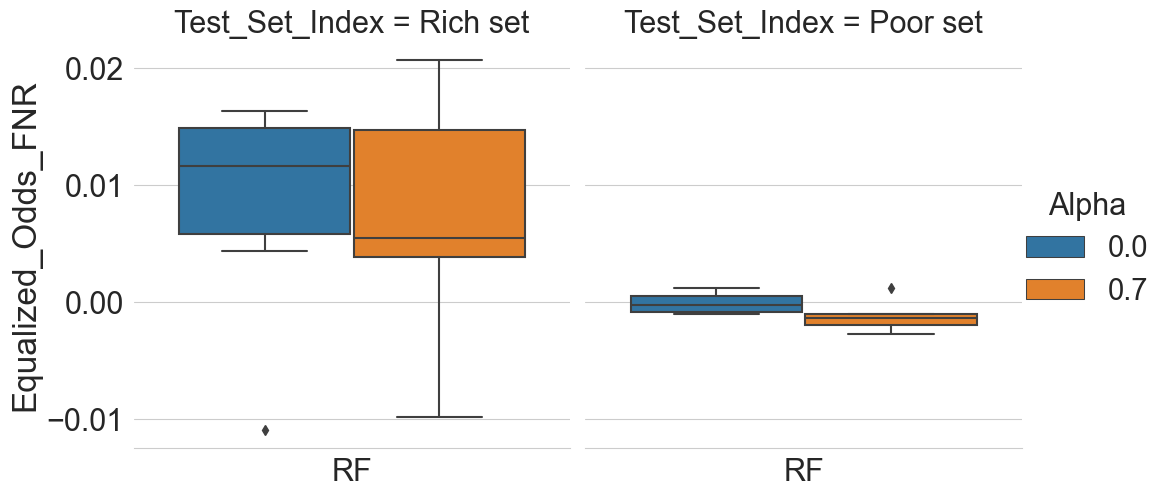

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

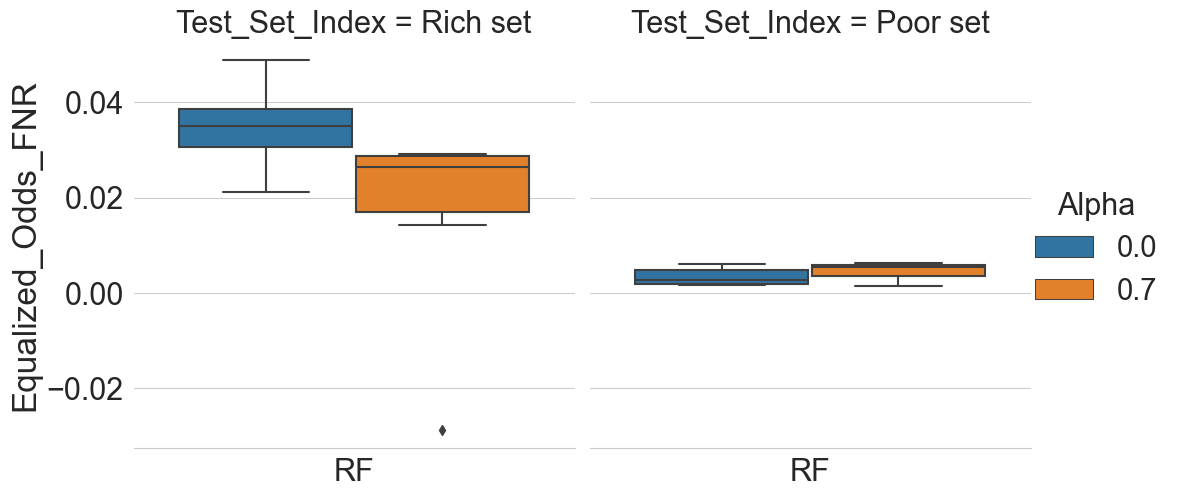

In [27]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

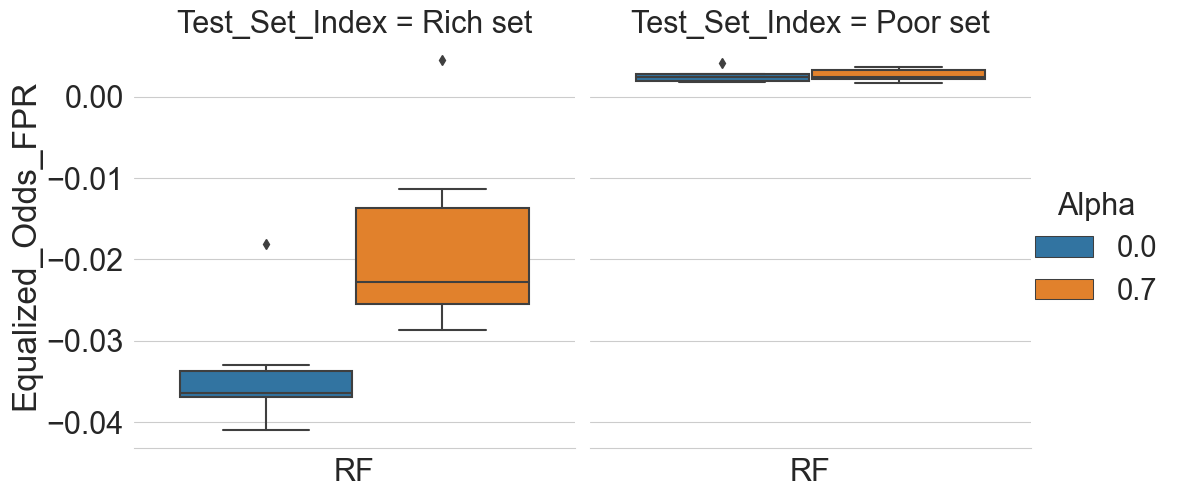

In [28]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)